In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import random
import numpy as np
from matplotlib import pyplot as plt
from syd import Viewer

from vrAnalysis.database import get_database
from vrAnalysis.helpers import edge2center, get_placefield_location
from vrAnalysis.processors.placefields import get_frame_behavior, get_placefield, FrameBehavior, Placefield, get_placefield
from vrAnalysis.sessions import B2Session
from vrAnalysis.syd.placefield_viewer import PlacefieldViewer

sessiondb = get_database('vrSessions')
mousedb = get_database('vrMice')
tracked_mice = mousedb.get_table(tracked=True)["mouseName"].unique()

In [4]:
session = random.choice(sessiondb.iter_sessions(imaging=True, session_params={"spks_type": "oasis"}))

print(session)

B2Session(mouse_name='ATL027', date='2023-08-09', session_id='701', spks_type='oasis')


In [5]:
viewer = PlacefieldViewer(session)
viewer.show()

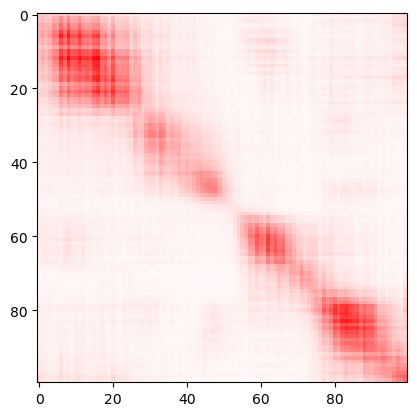

In [38]:
from vrAnalysis.helpers import cross_validate_trials

session = random.choice(sessiondb.iter_sessions(imaging=True, session_params={"spks_type": "oasis"}))

frame_behavior = get_frame_behavior(session)
trial_folds = cross_validate_trials(session.trial_environment, [1, 1])

num_bins = 100
dist_edges = np.linspace(0, session.env_length[0], num_bins + 1)
spks = session.spks[:, session.idx_rois]
placefield0 = get_placefield(spks, frame_behavior, dist_edges=dist_edges, speed_threshold=1.0, average=True, trial_filter=trial_folds[0])
placefield1 = get_placefield(spks, frame_behavior, dist_edges=dist_edges, speed_threshold=1.0, average=True, trial_filter=trial_folds[1])

idx_env = 0
pf00 = placefield0.placefield[idx_env]
pf10 = placefield1.placefield[idx_env]
cross_kernel = pf00 @ pf10.T

max = np.max(np.abs(cross_kernel))
plt.close('all')
plt.imshow(cross_kernel, cmap="bwr", vmin=-max, vmax=max)
plt.show()